In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
train = pd.read_csv(r'C:\Users\User\Downloads\train_loan.csv')
tr = train.copy()
test = pd.read_csv(r'C:\Users\User\Downloads\test_loan.csv')
ts = test.copy()

In [54]:
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
print("Train Shape",tr.shape)
print("Test Shape",ts.shape)

Train Shape (614, 13)
Test Shape (367, 12)


In [57]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
tr['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

69% Loans were approved

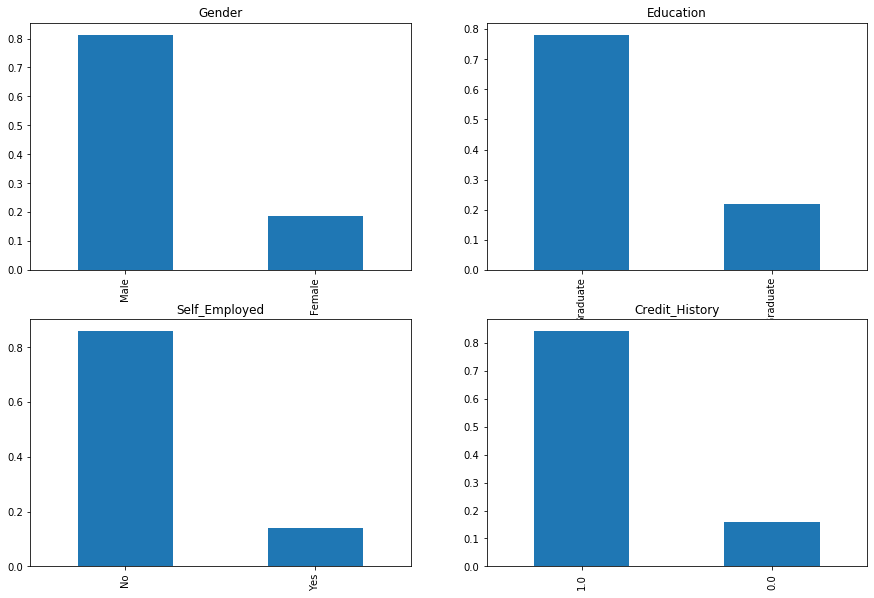

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
tr['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.subplot(2,2,2)
tr['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(2,2,3)
tr['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(2,2,4)
tr['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

Categorical Values

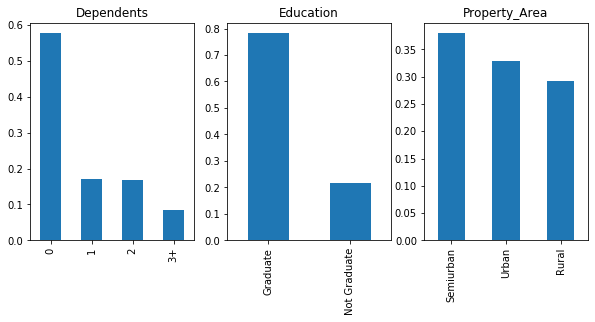

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
tr['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(1,3,2)
tr['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(1,3,3)
tr['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

Ordinal variable

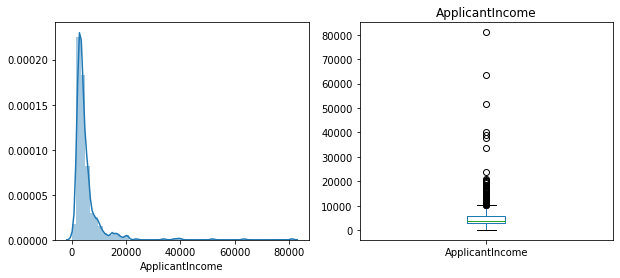

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
tr['ApplicantIncome'].plot.box(title = 'ApplicantIncome')

Text(0.5, 0.98, '')

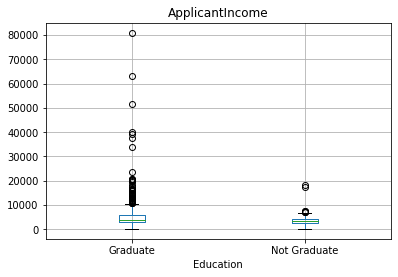

In [62]:
tr.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

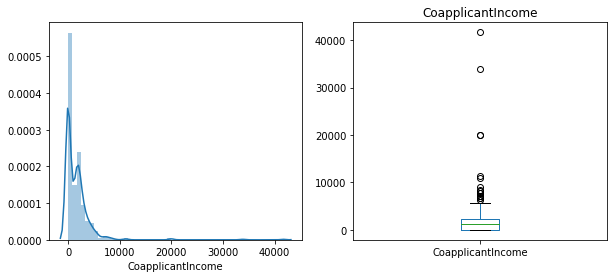

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,2,2)
tr['CoapplicantIncome'].plot.box(title = 'CoapplicantIncome')

Text(0.5, 0.98, '')

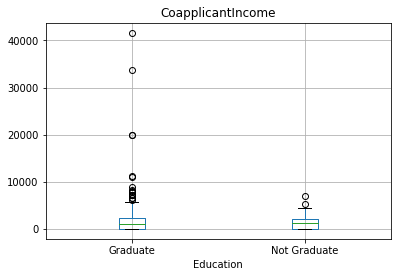

In [64]:
tr.boxplot(column='CoapplicantIncome', by = 'Education') 
plt.suptitle("")

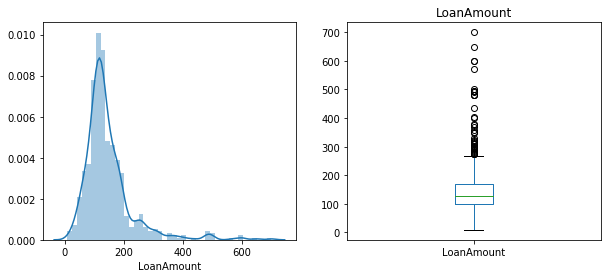

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
tr['LoanAmount'].plot.box(title = 'LoanAmount')

In [66]:
Gender = pd.crosstab(tr['Gender'],tr['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


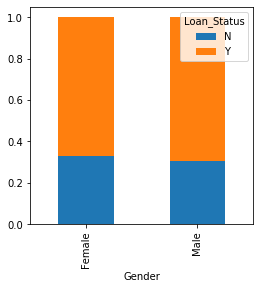

In [67]:

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))

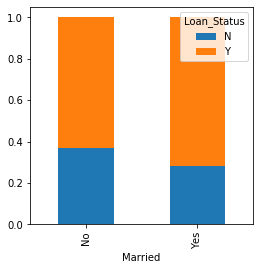

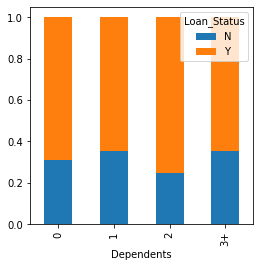

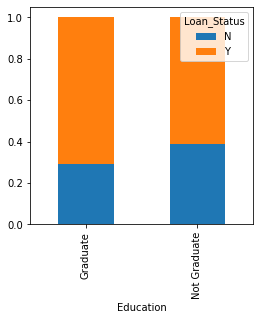

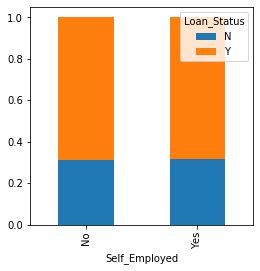

In [68]:
Married = pd.crosstab(tr['Married'],tr['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()
Dependents = pd.crosstab(tr['Dependents'],tr['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()

Education = pd.crosstab(tr['Education'],tr['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()

Self_Employed = pd.crosstab(tr['Self_Employed'],tr['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()


In [69]:
tr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
tr['Gender'].fillna(tr['Gender'].mode()[0],inplace = True)
tr['Married'].fillna(train['Married'].mode()[0],inplace = True)
tr['Dependents'].fillna(tr['Dependents'].mode()[0],inplace = True)
tr['Self_Employed'].fillna(tr['Self_Employed'].mode()[0],inplace = True)
tr['Credit_History'].fillna(tr['Credit_History'].mode()[0],inplace = True)

In [71]:
tr.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
Loantermcount = tr['Loan_Amount_Term'].value_counts()
Loantermcount

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [79]:
tr['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)
tr['LoanAmount'].fillna(tr['LoanAmount'].mean(),inplace = True)

In [76]:
tr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
Outlier Treatment

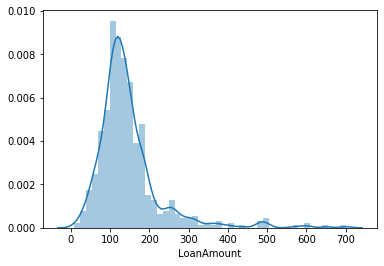

In [81]:
sns.distplot(tr['LoanAmount'])

In [82]:
tr['LoanAmount_log'] = np.log(tr['LoanAmount'])

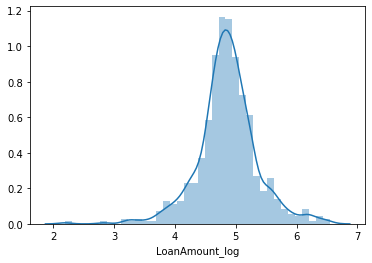

In [83]:
sns.distplot(tr['LoanAmount_log'])

In [94]:
tr_x = train.drop(['Loan_Status','Loan_ID'],axis = 1)
tr_y = tr['Loan_Status']

In [95]:
tr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
